In [6]:
!pip install tensorflow streamlit matplotlib numpy pandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached protobuf-4.25.4-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB 259.2 kB/s eta 0:01:00
   ---------------------------------------- 0.0/15.5 MB 217.9 kB/s eta 0:01:12
   ---------------------------------------- 0.1/15.5 MB 351.4 kB/s eta 0:00:44
   ---------------------------------------- 0.1/15.5 MB 450.6 kB/s eta 0:00:35
   ---------------------------------------- 0.2/15.5 MB 551.6 kB/s eta 0:00:28
    --------------------------------------- 0.2/15.5 MB 625.1 kB/s eta 0:00:25
    --------------------------------------- 0.3/15.5 MB 628.5 kB/s eta 0:00:25
    -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [50]:
# Drive path /content/drive/MyDrive/Fruits_Vegetables
#C:/Users/Imran Rashid/Downloads/Fruits_Vegetables

data_train_path = 'C:/Users/Imran Rashid/Downloads/Fruits_Vegetables/train'
data_test_path = 'C:/Users/Imran Rashid/Downloads/Fruits_Vegetables/test'
data_val_path = 'C:/Users/Imran Rashid/Downloads/Fruits_Vegetables/validation'

In [52]:
image_width = 180
image_height = 180

In [54]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(image_width, image_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [56]:
data_cat = data_train.class_names
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [142]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(image_width, image_height),
    batch_size=32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [144]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(image_width, image_height),
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


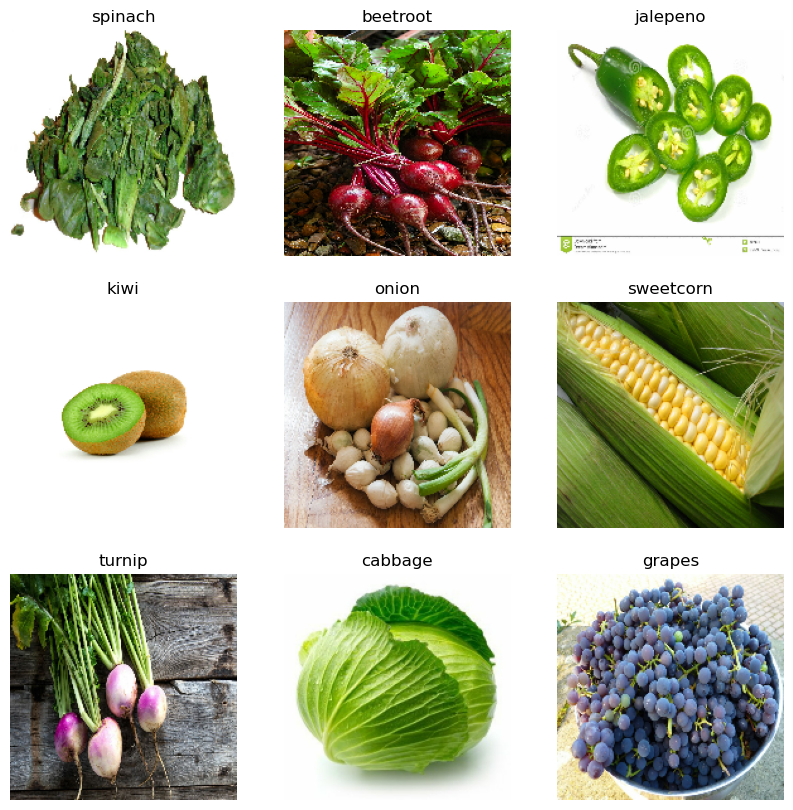

In [28]:
plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [146]:
from tensorflow.keras.models import Sequential

In [148]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [150]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [152]:
epochs_size = 25
history = model.fit(
  data_train,
  validation_data=data_val,
  epochs=epochs_size
)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 338ms/step - accuracy: 0.0697 - loss: 3.8698 - val_accuracy: 0.3789 - val_loss: 2.3137
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 370ms/step - accuracy: 0.3242 - loss: 2.4035 - val_accuracy: 0.6724 - val_loss: 1.4306
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 376ms/step - accuracy: 0.4827 - loss: 1.7847 - val_accuracy: 0.8291 - val_loss: 0.7778
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 410ms/step - accuracy: 0.6431 - loss: 1.2013 - val_accuracy: 0.8946 - val_loss: 0.4814
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 618ms/step - accuracy: 0.8047 - loss: 0.6665 - val_accuracy: 0.8946 - val_loss: 0.5295
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 655ms/step - accuracy: 0.8776 - loss: 0.4313 - val_accuracy: 0.9487 - val_loss: 0.3566
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 377ms/step - accuracy: 0.9308 - loss: 0.3036 - val_accuracy: 0.9430 - val_loss: 0.3114
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9527 - loss: 0.2218 - val_accura

Text(0.5, 1.0, 'Training and Validation Loss')

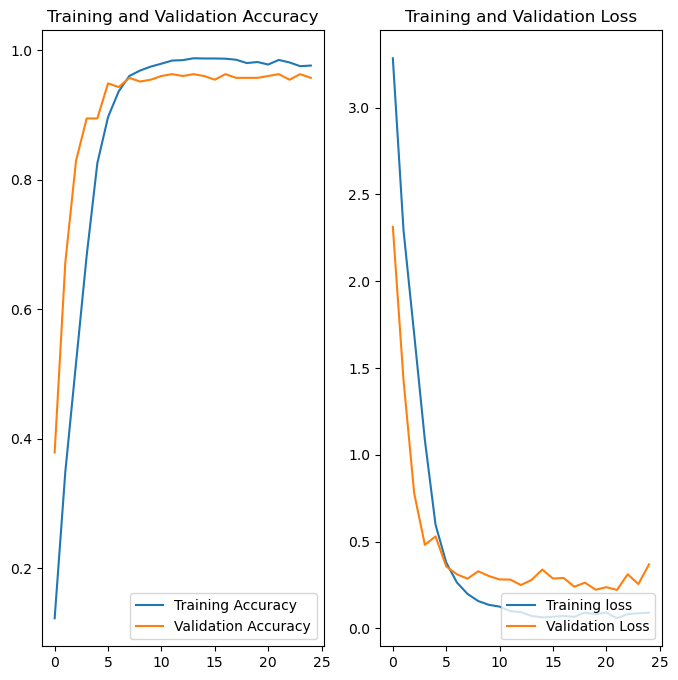

In [153]:
epochs_range = range(epochs_size)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

In [34]:
image = 'C:/Users/Imran Rashid/Downloads/Fruits_Vegetables/Apple.jpg'

In [36]:
image = tf.keras.utils.load_img(image, target_size=(image_width, image_height))
img_arr = tf.keras.utils.img_to_array(image)
img_bat = tf.expand_dims(img_arr, 0)

In [26]:
loaded_model = tf.keras.load_model('C:/Users/Imran Rashid/Downloads/Fruits_Vegetables/Fruit_Veg_Classifer.keras')

AttributeError: module 'keras._tf_keras.keras' has no attribute 'load_model'

In [38]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


In [40]:
score = tf.nn.softmax(predict[0])

In [58]:
print('Veg/Fruit in image {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image apple with accuracy of 99.94


In [192]:
model.save('C:/Users/Imran Rashid/Documents/AI_Bootcamp/Portfolio Project/Fruit_Veg_Classifer.keras')

In [20]:
model.load('C:/Users/Imran Rashid/Documents/AI_Bootcamp/Portfolio Project/Fruit_Veg_Classifer.keras')

NameError: name 'model' is not defined

In [30]:
import joblib

In [190]:
drive_path = 'C:/Users/Imran Rashid/Downloads/Fruits_Vegetables/'
filename = 'Fruit_Veg_Classifer.pkl'
joblib.dump(model, drive_path + filename)

['C:/Users/Imran Rashid/Documents/AI_Bootcamp/Portfolio Project/Fruit_Veg_Classifer.pkl']

In [32]:
model = joblib.load('C:/Users/Imran Rashid/Downloads/Fruits_Vegetables/Fruit_Veg_Classifer.pkl')

In [60]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd

In [62]:
app = FastAPI()

In [68]:
class type(BaseModel):
    image = tf.keras.utils.load_img(image, target_size=(image_width, image_height))
    img_arr = tf.keras.utils.img_to_array(image)
    img_bat = tf.expand_dims(img_arr, 0)

TypeError: path should be path-like or io.BytesIO, not <class 'PIL.Image.Image'>

In [66]:
@app.post('/predict')

SyntaxError: incomplete input (290640975.py, line 1)